In [1]:
#Importing required librairies.
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# This function takes as input a list that contains vertices that cannot be equal to each other. What it does is it creates a list and fills this with edges between the vertices that are contained in the input. These edges are only defined for i<j, as this already enforces the same constrained for i>j. The output will be the resulting list containing the desired edges.
def putListToCoordinateList(list):
    result = []
    for i in range(len(list)):
        for j in range(len(list)):
            if list[i]<list[j]:
                result.append((list[i], list[j]))
    return result

In [3]:
# This function takes as inputs the number of vertices and the squareroot of this same number. It then evaluates lists containing vertices that cannot be equal to each other. Namely each row, collumn and block of the shi/sudoku should not contain different values. Hence it will return lists that contain the indices of the vertices that are in a row toghether, in a collumn toghether or in a 4x4 or 3x3 block toghether.

def putRestrictionList(numberOfVertices, squareRootNumberOfVertices):
    rows = [[i + j * numberOfVertices for i in range(numberOfVertices)] for j in range(numberOfVertices)]  
    cols = [[j + i * numberOfVertices for i in range(numberOfVertices)] for j in range(numberOfVertices)] 
    blocks = [
            [i + j * numberOfVertices for i in range(start_row, start_row + squareRootNumberOfVertices) for j in range(start_col, start_col + squareRootNumberOfVertices)]
            for start_row in range(0, numberOfVertices, squareRootNumberOfVertices) for start_col in range(0, numberOfVertices, squareRootNumberOfVertices)
    ]
    return [rows, cols, blocks]

In [4]:
# This function is defined only for the case where we are evaluating the solution to the grobner basis for the sudoku. As the polynomials are all linear, in terms of w and equall to 0, the function takes these polynomials as an input and will put every term except for the vertice term to the right. Essentially it solves these determined polynomials.
def extractSolutions(polynomials):
    solutions = {}
    for p in polynomials:
        variable = list(p.variables())[0]
        value = -p.constant_coefficient()
        solutions[variable] = value
    return solutions

In [5]:
# the function finds a solution to a sudoku example found in on internet. It calculates the solution through an extention to Q. 
def generateSudokuSolution(): 
    R.<w> = PolynomialRing(QQ) #Define the polynomial ring.
    F.<w> = NumberField(w^(6) + w^(3) + 1) #Define the number field over the 4th cyclotomic polynomial.
    R = PolynomialRing(F, 81, names='x', order='degrevlex') #Extend the polynomial ring.
    x = R.gens() #Declare the vertice variables.
    k = 9 #Set chromatic number.
    rules = putRestrictionList(k,3) #Declares the rules and can be seen as an set of edge sets.
    index = list(range(0, k^2)) #Declates a list of indices.
    functions = []
    
    for i in index:
        functions.append(x[i]^k - 1) #Set the collour constraints.
    edges = []
    for rule in rules:
        for ruleList in rule:
            edges.extend(putListToCoordinateList(ruleList)) #Set rule edges into the edge list.
            
    for edge in edges:
        functions.append(sum([x[edge[0]]^(k-1-m)* x[edge[1]]^(m) for m in range(0,k)])) #Set the edge constraints.
    
    #Intialize known values
    substitutionDictionairy = {x[3]: w, x[4] : w^5, x[6] : w^6, x[8] : 1, x[9] : w^5, x[10] : w^7, x[13] : w^6, x[16] : w^8, x[18] : 1, x[19] : w^8, x[23] : w^3, x[24] : w^4, x[27] : w^7, x[28]: w, x[30] : 1, x[34] : w^3, x[38] : w^3,x[39] : w^5, x[41] : w,x[42] : w^8,x[46] : w^4, x[50] : w^2,x[52] : w,x[53] : w^7,x[56] : w^8,x[57] : w^2, x[61] : w^6, x[62] : w^3, x[64] : w^3, x[67] : w^4, x[70]: w^2, x[71] : w^5, x[72] : w^6, x[74] : w^2, x[76]: 1, x[77] : w^7}
    
    #Intialize filled indeces
    filledInVertices = [3, 4, 6, 8, 9, 10, 13, 16, 18, 19, 23, 24, 27, 28, 30, 34, 38, 39, 41, 42, 46, 50, 52, 53, 56, 57, 61, 62, 64, 67, 70, 71, 72, 74, 76, 77]
    
    #Substitude the filled in values into the functions
    evaluatedFunctions = [f.subs(substitutionDictionairy) for f in functions]
    
    listWithoutZeros = [item for item in evaluatedFunctions if item != R(0)] #Clear redundand 0's
    
    #Append value constraints 
    listWithoutZeros.append(x[3] - w)
    listWithoutZeros.append(x[4] - w^5)
    listWithoutZeros.append(x[6] - w^6)
    listWithoutZeros.append(x[8] - 1)
    listWithoutZeros.append(x[9] - w^5)
    listWithoutZeros.append(x[10] - w^7)
    listWithoutZeros.append(x[13] - w^6)
    listWithoutZeros.append(x[16] - w^8)
    listWithoutZeros.append(x[18] - 1)
    listWithoutZeros.append(x[19] - w^8)
    listWithoutZeros.append(x[23] - w^3)
    listWithoutZeros.append(x[24] - w^4)
    listWithoutZeros.append(x[27] - w^7)
    listWithoutZeros.append(x[28] - w)
    listWithoutZeros.append(x[30] - 1)
    listWithoutZeros.append(x[34] - w^3)
    listWithoutZeros.append(x[38] - w^3)
    listWithoutZeros.append(x[39] - w^5)
    listWithoutZeros.append(x[41] - w)
    listWithoutZeros.append(x[42] - w^8)
    listWithoutZeros.append(x[46] - w^4)
    listWithoutZeros.append(x[50] - w^2)
    listWithoutZeros.append(x[52] - w)
    listWithoutZeros.append(x[53] - w^7)
    listWithoutZeros.append(x[56] - w^8)
    listWithoutZeros.append(x[57] - w^2)
    listWithoutZeros.append(x[61] - w^6)
    listWithoutZeros.append(x[62]-w^3)
    listWithoutZeros.append(x[64]-w^3)                
    listWithoutZeros.append(x[67]-w^4)
    listWithoutZeros.append(x[70]-w^2)        
    listWithoutZeros.append(x[71]-w^5)
    listWithoutZeros.append(x[72]-w^6)
    listWithoutZeros.append(x[74]-w^2)
    listWithoutZeros.append(x[76]-1)
    listWithoutZeros.append(x[77]-w^7)

    
    I = Ideal(listWithoutZeros) #Let sage compute the ideal defined by the constraints
    G = I.groebner_basis() #Let sage compute the gröbner basis by the ideal
    solutions = extractSolutions(list(G))
    
    if list(G)==[1]:
        raise ValueError("The system is inconsistent. No solution exists due to conflicting constraints.")
     
    #Rephrase solution values to sudoku integers
    valuesInW = {'1':1, 'w':2,"w^2":3 ,"w^3": 4, "w^4":5,
                  "w^5":6, "-w^3 - 1": 7,
                 "-w^4 - w": 8, "-w^5 - w^2": 9}
    for sol in solutions:
        value = solutions[sol]
        solutions[sol] = valuesInW[str(value)]
    return (list(solutions.values()), filledInVertices)


In [6]:
#This function plots a colloured graph using the solution and edges as inputs.
def plotGraph(obtainedSolution, coordinateList, filledInVertices, filled):
    
    G = nx.Graph() #Initiate a graph
    for i in range(1,len(obtainedSolution)): #Set nodes
        G.add_node(i)
    
    positions ={}
    #Initializing coordinate possitions for both black (filled) and green (unfilled values)
    positionsBlack = {}
    positionsGreen = {}
    
    solutionsBlack = {}
    solutionsGreen = {}
    
    for i in range(len(coordinateList)):
        positions[i] = coordinateList[i]
        if i in filledInVertices:
            positionsBlack[i] = coordinateList[i]
            solutionsBlack[i] = obtainedSolution[i]
        else:
            positionsGreen[i] = coordinateList[i]
            solutionsGreen[i] = obtainedSolution[i]  
            
    options = {
        "font_size": 16,
        "node_size": 0,
        "edgecolors": "black",
        "linewidths": 2,
        "width": 4,
    }
    
    nx.draw(G, positions, **options)

    nx.draw_networkx_labels(G, positionsBlack, labels=solutionsBlack,
                            font_size=16, font_color="black")
    if filled: #Check whether the green vertices have to be filled in.
        nx.draw_networkx_labels(G, positionsGreen, labels=solutionsGreen, font_size=16, font_color="green")
    
    for y in range(-4, -22, -2): 
        plt.hlines(y, -18, 0, linewidth=1, colors='black')
    for x in range(-18, 2, 2):
        plt.vlines(x, -20, -2, linewidth=1, colors='black')

    # Dikkere lijnen (blokgrenzen)
    for y in range(-2, -26, -6):
        plt.hlines(y, -18, 0, linewidth=3, colors='black')
    for x in range(-18, 2, 6):
        plt.vlines(x, -20, -2, linewidth=3, colors='black')

    



    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")
    plt.show()
    

In [7]:
#This function generates the coordinates for the sudoku raster.
def generateCoordinateList():
    coordinates = []
    for j in range(-2, -20, -2):  
        for i in range(-2, -20, -2):
            coordinates.append((i+1, j-1))
    
    return coordinates

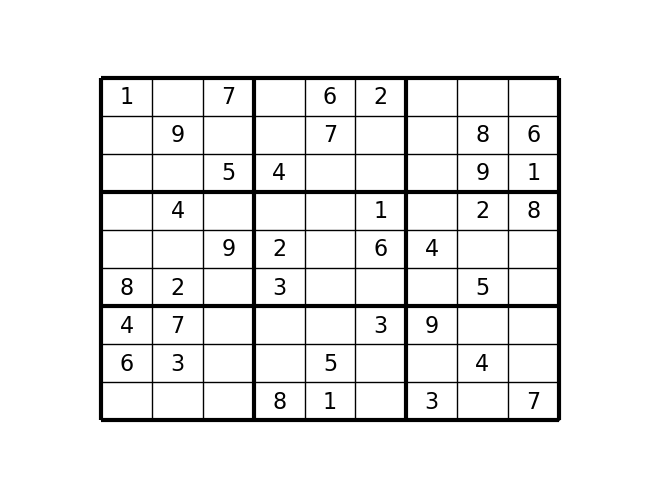

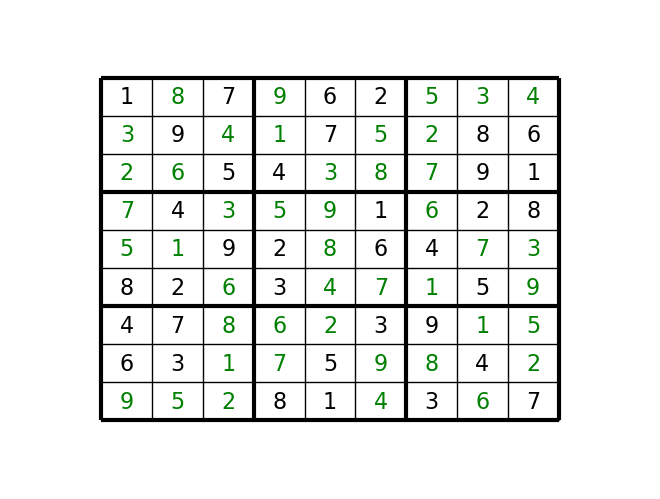

In [8]:
coordinateList = generateCoordinateList()
(solution, filledInVertices) = generateSudokuSolution()
solution = {i:solution[i] for i in range(len(solution))}

plotGraph(solution, coordinateList, filledInVertices, False)
plotGraph(solution, coordinateList, filledInVertices, True)